## Первичный анализ данных

### Вариант 12

#### Задачи лабораторной работы:
* получение программного доступа к данным, содержащимся в источниках различного типа;
* выполнение предварительного анализа данных и получение обобщенных характеристик наборов данных;
* исследование простых методов визуализации данных;
* изучение основных библиотек Python для работы с данными.

#### Описание набора данных

Все транзакции, произошедшие между 01/12/2010 и 09/12/2011 для зарегистрированного в Великобритании и не имеющего физических магазинов онлайн-розничного предприятия.

#### Вывод таблицы со всеми данными

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

data_path = "C:\\Users\\Mvideo\\mlda\\lab_02\\onl_ret.csv"
df = pd.read_csv(data_path, encoding='utf-8')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#### Вывод таблицы с сортировкой по количеству транзакций совершенных в разных странах

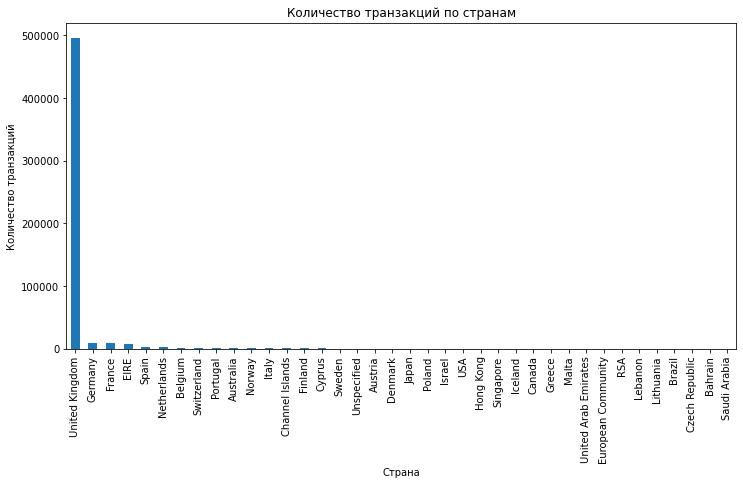

In [3]:
import matplotlib.pyplot as plt

# Группировка данных по странам и подсчет количества транзакций
transactions_by_country = df['Country'].value_counts()

# Создание столбчатой диаграммы
plt.figure(figsize=(12, 6))
transactions_by_country.plot(kind='bar')
plt.title('Количество транзакций по странам')
plt.xlabel('Страна')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=90)  # Поворот подписей на оси x
plt.show()

На основе выборки можем сделать вывод, что большая часть транзакций совершена в Великобритании.

#### Сортировка по дате покупки

In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='mixed')

df.sort_values(by='InvoiceDate', inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France


#### Заполнение пустующих значений

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Сортировка по качеству

In [6]:
df = df[df['Quantity'] > 0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France


#### Сортировка по количеству проданных вещей

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(1, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(2, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(3, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(4, 0, 'PARTY BUNTING'),
  Text(5, 0, 'LUNCH BAG RED RETROSPOT'),
  Text(6, 0, 'SET OF 3 CAKE TINS PANTRY DESIGN '),
  Text(7, 0, 'LUNCH BAG  BLACK SKULL.'),
  Text(8, 0, 'POSTAGE'),
  Text(9, 0, 'PACK OF 72 RETROSPOT CAKE CASES'),
  Text(10, 0, "PAPER CHAIN KIT 50'S CHRISTMAS "),
  Text(11, 0, 'SPOTTY BUNTING'),
  Text(12, 0, 'LUNCH BAG SPACEBOY DESIGN '),
  Text(13, 0, 'LUNCH BAG CARS BLUE'),
  Text(14, 0, 'HEART OF WICKER SMALL')])

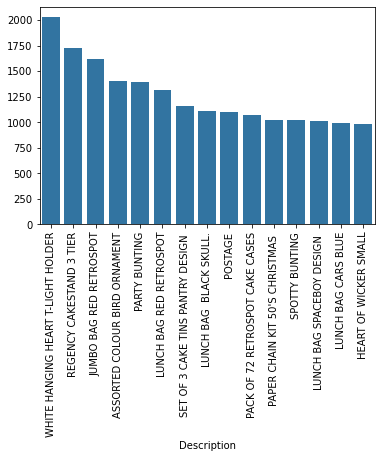

In [7]:
import seaborn as sns

item_counts = df['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
sns.barplot(x=item_counts.index, y=item_counts.values)
plt.xticks(rotation=90)

#### Сортировка по id пользователя

Смотрим, какое количество фунтов потратил каждый клиент в данном магазине за 2010-2011 г.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '12748.0'),
  Text(1, 0, '13089.0'),
  Text(2, 0, '13263.0'),
  Text(3, 0, '14096.0'),
  Text(4, 0, '14156.0'),
  Text(5, 0, '14159.0'),
  Text(6, 0, '14298.0'),
  Text(7, 0, '14606.0'),
  Text(8, 0, '14646.0'),
  Text(9, 0, '14796.0'),
  Text(10, 0, '14911.0'),
  Text(11, 0, '15039.0'),
  Text(12, 0, '15311.0'),
  Text(13, 0, '17841.0'),
  Text(14, 0, '18118.0')])

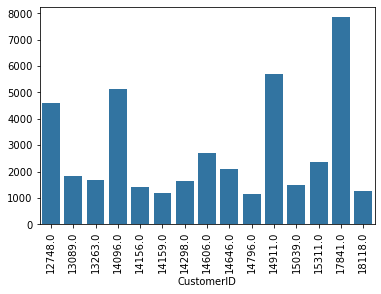

In [8]:
item_counts = df['CustomerID'].value_counts().sort_values(ascending=False).iloc[0:15]
sns.barplot(x=item_counts.index, y=item_counts.values)
plt.xticks(rotation=90)

#### Сортировка по количеству проданного

График с количеством продаж в каждом месяце с декабря 2010 года по декабрь 2011.

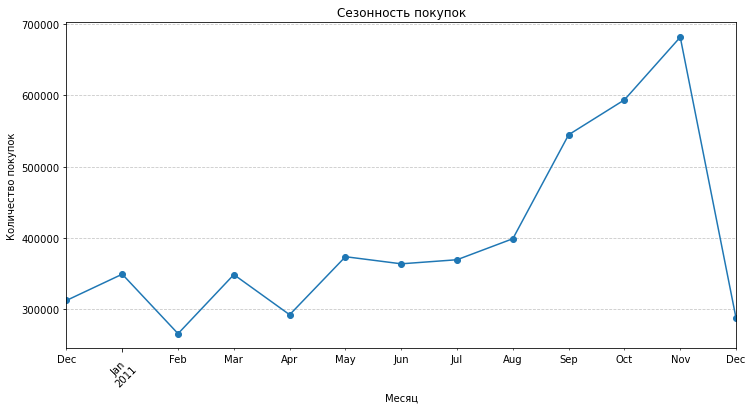

In [9]:
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

# Визуализация сезонности покупок
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Сезонность покупок')
plt.xlabel('Месяц')
plt.ylabel('Количество покупок')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Наибольшее количество продаж было совершено в ноябре 2011, наименьшее - в феврале 2010.

#### Сортировка по сезонности

Указан сезон и количество продаж в каждом месяце для всех значений таблицы.

C:\Users\Mvideo\AppData\Local\Temp\ipykernel_16200\58510542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d.%m.%Y %H:%M')
C:\Users\Mvideo\AppData\Local\Temp\ipykernel_16200\58510542.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df['Month'].apply(get_season)


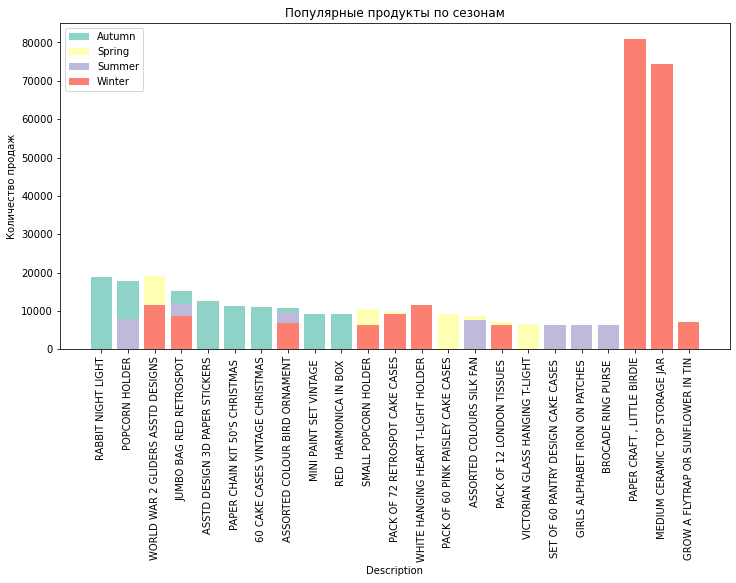

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d.%m.%Y %H:%M')

# Определение сезонов на основе месяцев
def get_season(month):
    if 3 <= month <= 5:
        return "Spring"
    elif 6 <= month <= 8:
        return "Summer"
    elif 9 <= month <= 11:
        return "Autumn"
    else:
        return "Winter"
    
# Применение функции к столбцу и использование .loc для создания нового столбца 'Season'
df['Season'] = df['Month'].apply(get_season)

# Группировка данных по сезонам и продуктам
seasonal_product_sales = df.groupby(['Season', 'Description'])['Quantity'].sum().reset_index()

# Фильтрация топ N популярных продуктов для каждого сезона (здесь N = 10)
top_n_products_by_season = seasonal_product_sales.groupby('Season').apply(lambda x: x.nlargest(10, 'Quantity')).reset_index(drop=True)

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
for season, data in top_n_products_by_season.groupby('Season'):
    plt.bar(data['Description'], data['Quantity'], label=season)

plt.title('Популярные продукты по сезонам')
plt.xlabel('Description')
plt.ylabel('Количество продаж')
plt.legend()
plt.xticks(rotation=90)
plt.show()

#### Сортировка цены в порядке убывания

In [ ]:
df = df[df['UnitPrice'] > 0]

# Сортировка DataFrame по столбцу "UnitPrice" в порядке убывания
df = df.sort_values(by='UnitPrice', ascending=False)

df

#### Общая цена продаж по месяцам

C:\Users\Mvideo\AppData\Local\Temp\ipykernel_16200\4287089431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].dt.month


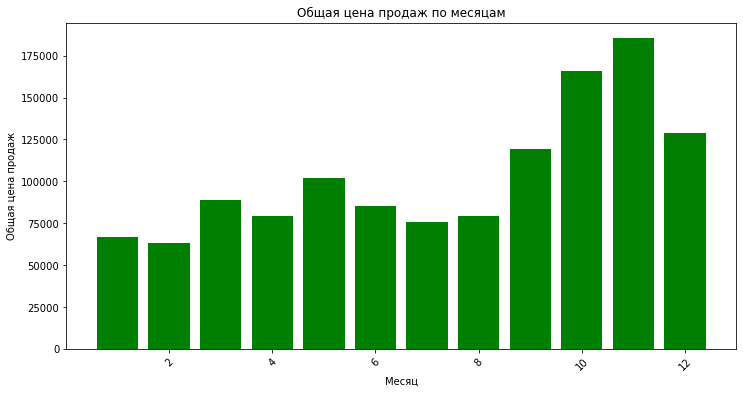

In [15]:
df['Month'] = df['InvoiceDate'].dt.month

# Группировка по месяцам и вычисление общей цены для каждого месяца
monthly_sales = df.groupby('Month')['UnitPrice'].sum().reset_index()

# Определите пороговую сумму для сравнения (например, 1000)
threshold = 1000

high_sales = monthly_sales[monthly_sales['UnitPrice'] > threshold]

import matplotlib.pyplot as plt

# Общая цена продаж по месяцам
plt.figure(figsize=(12, 6))
plt.bar(high_sales['Month'], high_sales['UnitPrice'], color='green')
plt.title('Общая цена продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Общая цена продаж')
plt.xticks(rotation=45)
plt.show()

#### Вопросы

1. Какие инструментальные средства используются для организации рабочего места специалиста Data Science?
    * интегрированные среды разработки
    * языки программирования
    * библиотеки для анализа данных
    * средства контейнеризации
    * облачные платформы
2. Какие библиотеки Python используются для работы в области машинного обучения? Дайте краткую характеристику каждой библиотеке.
    * TensorFlow
    * ScikitLearn
    * Pandas
    * Numpy
    * Keras
    * Matplotlib
    * Seaborn
3. Почему при реализации систем машинного обучения широкое распространение получили библиотеки Python?
    * большое количество библиотек и фреймворков
    * интеграция с другими языками и инфраструктурой
    * промышленное применение